# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
set_nbr = 1
record = 1 

stats = {}

print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    if record <= 60:
        print(f'Processing Record {record} of Set {set_nbr} | {city}')
        url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + api_key
        response = requests.get(url)        
        #print(response.url)
        data = response.json()
        #pprint(data)#['cod'])
        if data['cod'] != '404':
            stats[city] = data
        else:   
            print(f'City <{city}> not found. Skipping...')
        record +=1
    else:        
        #exit
        time.sleep(60)
        set_nbr += 1
        record = 1
    
#print(f'{stats.keys()}')    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | salym
Processing Record 12 of Set 1 | krasnoarmeysk
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | mount isa
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | mar del plata
Proces

Processing Record 55 of Set 3 | markdorf
Processing Record 56 of Set 3 | santa maria
Processing Record 57 of Set 3 | nishihara
Processing Record 58 of Set 3 | shetpe
Processing Record 59 of Set 3 | myitkyina
Processing Record 60 of Set 3 | fortuna
Processing Record 1 of Set 4 | akkermanovka
City <akkermanovka> not found. Skipping...
Processing Record 2 of Set 4 | araouane
Processing Record 3 of Set 4 | lavrentiya
Processing Record 4 of Set 4 | durres
Processing Record 5 of Set 4 | kieta
Processing Record 6 of Set 4 | russkiy kameshkir
Processing Record 7 of Set 4 | vardo
Processing Record 8 of Set 4 | sao joao da barra
Processing Record 9 of Set 4 | geraldton
Processing Record 10 of Set 4 | ouahigouya
Processing Record 11 of Set 4 | namibe
Processing Record 12 of Set 4 | ostersund
Processing Record 13 of Set 4 | tabas
Processing Record 14 of Set 4 | manyana
Processing Record 15 of Set 4 | acapulco
Processing Record 16 of Set 4 | sogdiondon
City <sogdiondon> not found. Skipping...
Proce

Processing Record 1 of Set 7 | necochea
Processing Record 2 of Set 7 | son la
Processing Record 3 of Set 7 | tammisaari
City <tammisaari> not found. Skipping...
Processing Record 4 of Set 7 | damaturu
Processing Record 5 of Set 7 | norman wells
Processing Record 6 of Set 7 | guerrero negro
Processing Record 7 of Set 7 | dalvik
Processing Record 8 of Set 7 | gorele
Processing Record 9 of Set 7 | vila velha
Processing Record 10 of Set 7 | san pedro
Processing Record 11 of Set 7 | luau
Processing Record 12 of Set 7 | portobelo
Processing Record 13 of Set 7 | vallenar
Processing Record 14 of Set 7 | coihaique
Processing Record 15 of Set 7 | labytnangi
Processing Record 16 of Set 7 | berlevag
Processing Record 17 of Set 7 | juneau
Processing Record 18 of Set 7 | rorvik
Processing Record 19 of Set 7 | contamana
Processing Record 20 of Set 7 | turukhansk
Processing Record 21 of Set 7 | irricana
Processing Record 22 of Set 7 | buala
Processing Record 23 of Set 7 | mendoza
Processing Record 24 

Processing Record 6 of Set 10 | santa marinella
Processing Record 7 of Set 10 | kualakapuas
Processing Record 8 of Set 10 | moss point
Processing Record 9 of Set 10 | walvis bay
Processing Record 10 of Set 10 | krasnovishersk
Processing Record 11 of Set 10 | romitan
Processing Record 12 of Set 10 | escanaba
Processing Record 13 of Set 10 | malanje
Processing Record 14 of Set 10 | rosarito
Processing Record 15 of Set 10 | ola
Processing Record 16 of Set 10 | fenoarivo atsinanana
Processing Record 17 of Set 10 | grants
Processing Record 18 of Set 10 | shelburne
Processing Record 19 of Set 10 | temaraia
City <temaraia> not found. Skipping...
Processing Record 20 of Set 10 | ossora
Processing Record 21 of Set 10 | soyo
Processing Record 22 of Set 10 | marabba
Processing Record 23 of Set 10 | isla mujeres
Processing Record 24 of Set 10 | ambatofinandrahana
Processing Record 25 of Set 10 | dunedin
Processing Record 26 of Set 10 | korla
City <korla> not found. Skipping...
Processing Record 27

In [4]:
#df = pd.DataFrame.from_dict(stats, orient='columns')

In [5]:
#df.head()

In [18]:
dic_cities = {}
list_keys = ['City', 'Lat','Lng','Max Temp','Humidity','Wind Speed','Cloudiness','Date','Country']
list_values = []
list_cities = []

for city, val in stats.items():
    list_values.clear()
    #print(f'Lista - {list_values}')
    list_values.append(city)
    #print(city)
    #print(val.keys())
    #print(val.values())
    value = val
    #print(value)
    
    #for dic in value:
     #   print(dic)
    
    for key, valj in value.items():
        #print(key)
        #print(valj)
        #val_tmp = valj
        #print(val_tmp)
        #for k, v in val_tmp.items():
         #   print(v)            
        val3 = valj
        if key == 'sys':  
            #print('Country')
            #print(val3['country'])
            list_values.append(val3['country'])
            #list_country.append(val3['country'])
            
        if key == 'main':
            #print('temo max')
            #print(val3['temp_max'])     
            list_values.append(val3['temp_max'])
            #list_temp_max.append(val3['temp_max'])
            
        if key == 'main':
            #print('humid')
            #print(val3['humidity'])
            list_values.append(val3['humidity'])
            
        if key == 'wind':
            #print('speed')
            #print(val3['speed'])   
            list_values.append(val3['speed'])
            
        if key == 'dt':
            #val3 = valj
            #print('Dt')
            #print(valj)
            list_values.append(valj)
            
        if key == 'coord':
            #print('long-lat')
            #print(val3['lon'])
            #print(val3['lat'])
            list_values.append(val3['lat'])
            list_values.append(val3['lon'])
            
        if key == 'clouds':
            #print('clods')
            #print(val3['all'])
            list_values.append(val3['all'])
    #print(list_values)
    #dic_cities.keys = list_keys
    #d = dict(zip(L1,L2))
    dic_cities = dict(zip(list_keys, list_values))
    list_cities.append(dic_cities)
    #print(dic_cities)
    
    
#print(list_cities)    
#print(list_keys)
#print(list_values)
#df = pd.DataFrame.from_items(list_values)
df = pd.DataFrame(list_cities)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,0.0,CL,1.547172e+09,62.0,-53.16,-70.91,286.150,9.30
1,mataura,92.0,NZ,1.547174e+09,73.0,-46.19,168.86,286.361,9.31
2,tuktoyaktuk,20.0,CA,1.547172e+09,66.0,69.44,-133.03,239.150,3.60
3,avarua,75.0,CK,1.547172e+09,61.0,-21.21,-159.78,301.150,8.20
4,saint-philippe,90.0,CA,1.547172e+09,66.0,45.36,-73.48,262.750,10.30


In [19]:
df.to_csv(output_data_file, encoding='utf-8', index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
df.count()

City          534
Cloudiness    492
Country       492
Date          492
Humidity      492
Lat           492
Lng           492
Max Temp      492
Wind Speed    492
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

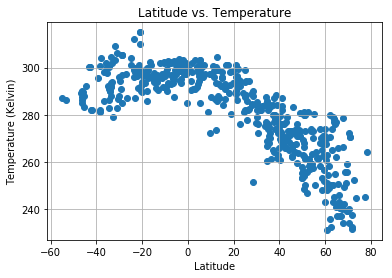

In [21]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

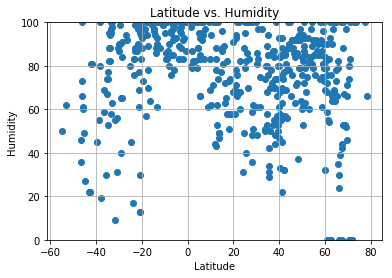

In [22]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0,100)

# Save the figure
plt.savefig("Latitude_Humidity_InWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

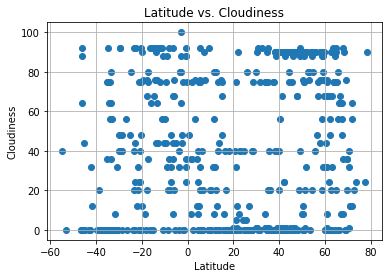

In [23]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Cloudiness_InWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

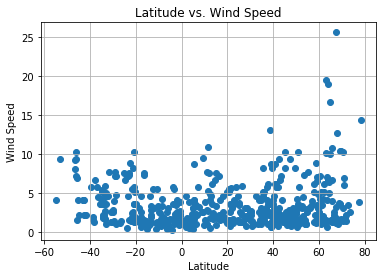

In [24]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_WindSpeed_InWorldCities.png")

# Show plot
plt.show()

# 1. The wind speed doesn't show too many discrepancies in order of the latitude, just as long is you increase the latitude, you could find outliers regarding the wind speed

# 2. As long as you find a city closer to 0° of latitude, you find higher humidity

# 3. You can find a clear negative relationship between latitude and temperature from latitude of 0°, in which you can see, as long as you get a greater amount of latitude, the temperature goes down